In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
%cd /content/drive/MyDrive/CSCE676_HW3

data = pd.read_csv('drug_abuse_data.csv')

/content/drive/MyDrive/CSCE676_HW3


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2576) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [191]:
df1 = data[['hrtcondag','highbpage','diabeteag','copdage','cirrosage','hepbcage','kidnydsag','asthmaage','hivaidsag']]

In [150]:
df1.describe()

,hrtcondag,highbpage,diabeteag,copdage,cirrosage,hepbcage,kidnydsag,asthmaage,hivaidsag
count,56136.000000,56136.000000,56136.000000,56136.000000,56136.000000,56136.000000,56136.000000,56136.00000,56136.000000
mean,947.862940,935.521448,947.461451,978.746954,997.479728,992.431933,989.497168,894.62402,997.823358
std,216.007241,238.081259,216.482383,138.275177,37.918688,79.439134,95.103216,303.64212,33.523003
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000
25%,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000
50%,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000
75%,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000
max,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000


In [234]:
# format the data to fit in the plot code below

def collect_data(age, catg, col_name, df):
  for c, n in col_name:
    for r in range(df.shape[0]):
      a = df[c].values[r]
      if 0 < a < 100: 
        age.append(a)
        catg.append(n)
  
  return age, catg

y = [     ('asthmaage','Asthma'),
     ('hrtcondag','Heart Condition'),
     ('copdage','COPD'),
     ('kidnydsag','Kidney'),
     ('hivaidsag','HIV/AIDS'),
     ('hepbcage','Hepatitis'),
     ('highbpage','High Blood Pressure'),
     ('diabeteag','Diabetes'),
     ('cirrosage','Cirrhosis'),
          

     ]

catg = []
age = []

df = df1
age1, catg1 = collect_data(age, catg, y, df)

age = age1
catg = catg1

# g = np.tile(list("ABCDEFGHIJ"), 50)

df = pd.DataFrame(dict(x=age, g=catg))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17901 entries, 0 to 17900
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       17901 non-null  int64 
 1   g       17901 non-null  object
dtypes: int64(1), object(1)
memory usage: 279.8+ KB
None


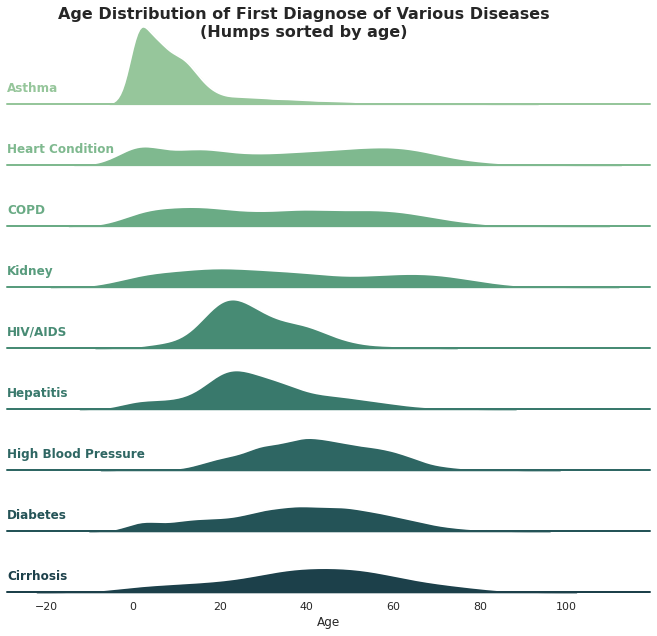

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df = pd.DataFrame(dict(x=age, g=catg))

# Initialize the FacetGrid object
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
pal = sns.cubehelix_palette(10, start=2.8, rot=-.4, light=.7)

g = sns.FacetGrid(df, row="g", hue="g", aspect=10, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", gridsize = 200,
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.0)

g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
# g.set_titles("Age Distribution of First Usage of Different Substances")
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution of First Diagnose of Various Diseases\n(Humps sorted by age)', fontsize=16, fontweight='bold')
g.set_xlabels(label="Age", fontsize=12)
# g.set_xticklabels(["0","20","40","60","80"], fontsize=12)
# g.set_xticklabels(fontsize=12)

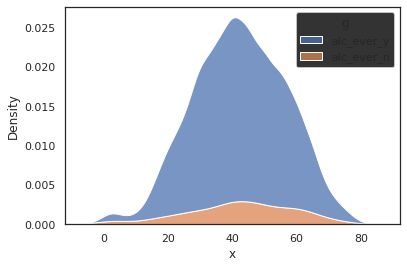

In [130]:
sns.kdeplot(data=df, x="x", hue="g", multiple="stack")

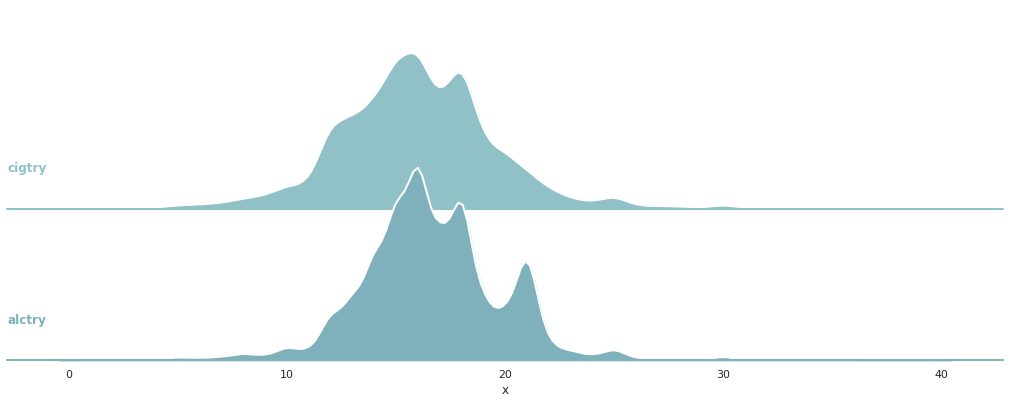

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)

# g = np.tile(["Alcohol","Cigarette","Marijuana"], 50)

age = age2
catg = catg2

# g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=age, g=catg))

# m = df.g.map(ord)
#df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=5, height=3, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",gridsize = 200,
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.0)

g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
# g.set_titles("Age Distribution of First Usage of Different Substances")
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [9]:
# df.head()
print(df["x"])
df["x"] += m
print(df["x"])

0      259.038123
1      264.147050
2      267.370011
3      272.791019
4      277.583534
          ...    
495    279.358022
496    285.212877
497    286.474247
498    292.251022
499    296.461828
Name: x, Length: 500, dtype: float64
0      324.038123
1      330.147050
2      334.370011
3      340.791019
4      346.583534
          ...    
495    349.358022
496    356.212877
497    358.474247
498    365.251022
499    370.461828
Name: x, Length: 500, dtype: float64


idea 3 heatmap correlation with cancer type and drug usage

In [ ]:
import pandas as pd
%cd /content/drive/MyDrive/CSCE676_HW3

data = pd.read_csv('drug_abuse_data.csv')

key_dict = {'cakidney':'Kidney',
            'camelanom':'Melanoma',
            'cabladder':'Bladder',
            'cabloleulym':'Blood/LEUKEMIA/LYMPHOMA',
            'CAOTHER2':'Other',
            'cabreast':'Breast',
            'caesopstom':'Stomach',
            'cagallivpan':'Liver',
            'calarylung': 'Lung',
            'camoutthro':'Mouth',
            'cathyroid':'THYROID',
            'caskinoth':'Skin',
            'cadrkcocn': 'Cocaine',
            'heroin':
            }

col = key_dict.keys()
col.append('')

df = data[]

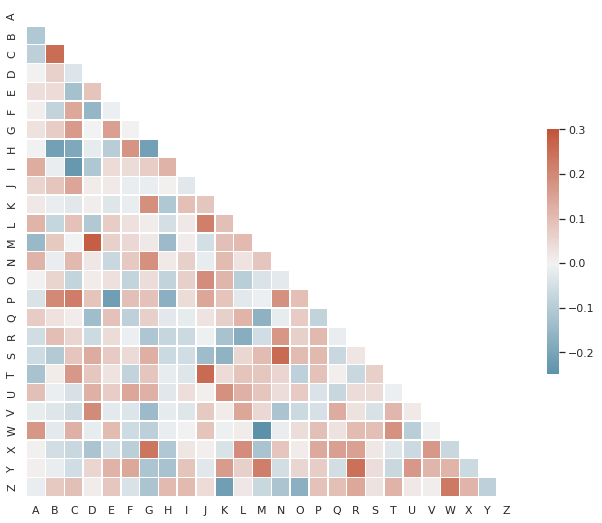

In [44]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

idea 2

In [119]:
# df = data[['ANYEDUC3','wrkdrgedu','txyrpriad']]

# df = data[['combatpy','AD_MDEA4','adwrspln','service']]

df = data[['alcever','cagallivpan']]
df.head()
df.describe()

,alcever,cagallivpan
count,56136.000000,56136.000000
mean,1.335026,96.351913
std,2.197573,15.732502
min,1.000000,1.000000
25%,1.000000,99.000000
50%,1.000000,99.000000
75%,2.000000,99.000000
max,97.000000,99.000000


In [120]:
df_1 = df[(df['alcever'] == 1)]
df_2 = df[df['alcever'] == 2]

print(len(df_1[df_1['cagallivpan']==1]))#, print(len())
print(len(df_1[df_1['cagallivpan']==2]))



print(len(df_2[df_2['cagallivpan']==1]))
print(len(df_2[df_2['cagallivpan']==2]))

print(df_1.describe())
print(df_2.describe())

19
1348
4
146
       alcever   cagallivpan
count  40098.0  40098.000000
mean       1.0     95.668662
std        0.0     17.606009
min        1.0      1.000000
25%        1.0     99.000000
50%        1.0     99.000000
75%        1.0     99.000000
max        1.0     99.000000
       alcever   cagallivpan
count  16008.0  16008.000000
mean       2.0     98.058783
std        0.0      9.350741
min        2.0      1.000000
25%        2.0     99.000000
50%        2.0     99.000000
75%        2.0     99.000000
max        2.0     99.000000


In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

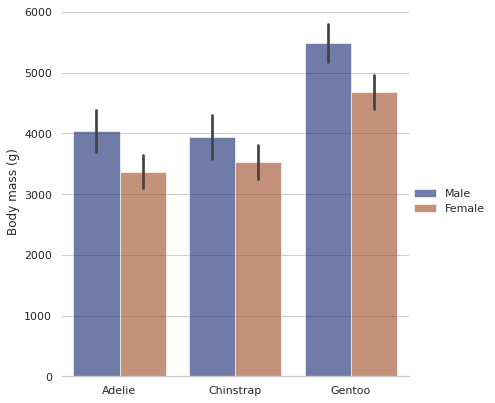

In [40]:

import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [39]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


idea 4: cigeratte useg , age , high blood pressure


In [131]:
df = data[['cigage','copdage','hrtcondag','highbpage','cigavgd','cancerevr','CASUPROB2','abpyillalc','ircgincr','cigever','alcever','cigaryfu','CIG100LF','iralcfy','anyneedl','depndalc']]

df =df[(df['highbpage']<100) & (df['hrtcondag']<100)]
df.describe()

,cigage,copdage,hrtcondag,highbpage,cigavgd,cancerevr,CASUPROB2,abpyillalc,ircgincr,cigever,alcever,cigaryfu,CIG100LF,iralcfy,anyneedl,depndalc
count,829.000000,829.000000,829.000000,829.000000,127.000000,829.000000,825.000000,829.000000,829.000000,829.000000,829.000000,829.00000,829.000000,829.000000,829.000000,829.000000
mean,539.641737,809.294331,47.417370,45.050663,14.019685,1.829916,0.128485,0.016888,78.554885,1.334138,1.123040,9984.12304,31.644150,461.822678,0.026538,0.018094
std,487.038170,380.872362,19.573273,15.564106,11.256462,0.375934,0.334832,0.128929,32.316310,0.471973,0.328681,277.00013,42.087699,450.709343,0.160826,0.133372
min,6.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2019.00000,1.000000,1.000000,0.000000,0.000000
25%,18.000000,999.000000,35.000000,35.000000,3.500000,2.000000,0.000000,0.000000,91.000000,1.000000,1.000000,9991.00000,1.000000,24.000000,0.000000,0.000000
50%,991.000000,999.000000,50.000000,45.000000,10.500000,2.000000,0.000000,0.000000,93.000000,1.000000,1.000000,9991.00000,2.000000,250.000000,0.000000,0.000000
75%,991.000000,999.000000,62.000000,56.000000,20.500000,2.000000,0.000000,0.000000,93.000000,2.000000,1.000000,9999.00000,91.000000,993.000000,0.000000,0.000000
max,999.000000,999.000000,98.000000,90.000000,50.000000,2.000000,1.000000,1.000000,98.000000,2.000000,2.000000,9999.00000,91.000000,993.000000,1.000000,1.000000


(0.0, 80.0)

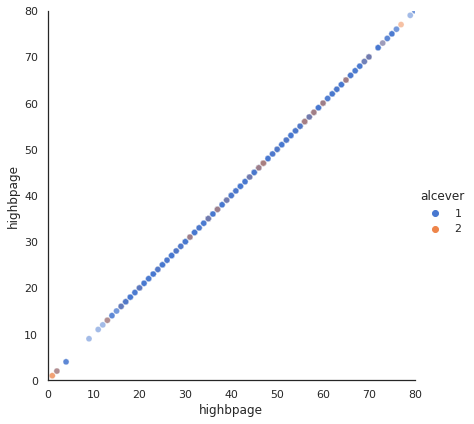

In [132]:

import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
# mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="highbpage", y="highbpage", 
            hue="alcever", 
            # size="iralcfy",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

plt.ylim(0, 80)
plt.xlim(0, 80)

In [31]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


smoke caner types

In [ ]:
df = data[['cancerevr','cigever','CIG100LF']]

df =df[(df['highbpage']<100) & (df['hrtcondag']<100)]
df.describe()

In [118]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


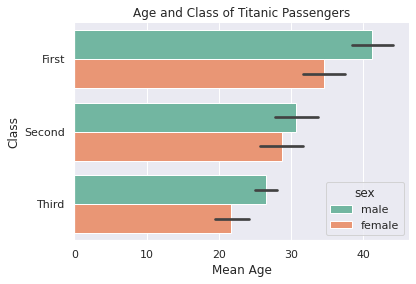

In [117]:
df = sns.load_dataset('titanic')
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.barplot(data=df, x="age", y='class', hue='sex')
plt.title('Age and Class of Titanic Passengers')
plt.xlabel('Mean Age')
plt.ylabel('Class')
sns.despine()
plt.show()